In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [129]:
df  = pd.read_csv('petrol.csv')   #reading the dataset

In [130]:
print('24MAI0111-Anmol Chaubey')
print(df.head())          #printing the top few rows of the dataset

24MAI0111-Anmol Chaubey
            Date  Delhi  Kolkata  Mumbai  Chennai
0  April 19 2018  74.07    76.77   81.92    76.84
1  April 18 2018  74.02    76.73   81.87    76.79
2  April 17 2018  74.02    76.73   81.87    76.79
3  April 16 2018  74.02    76.73   81.87    76.79
4  April 15 2018  73.98    76.69   81.83    76.75


In [131]:
print(df.isnull().sum())    #checks for the null values int the columns

Date       0
Delhi      0
Kolkata    0
Mumbai     0
Chennai    0
dtype: int64


In [132]:
df = df[['Date','Delhi']]   #selects the columns date and price of petrol in delhi 
df =df.dropna()     #drops the values with null values

In [133]:
df.reset_index(inplace=True)    #resets the index after the rest of rows

In [135]:
#Converts the date column to datetime objects with specified format
df['Date'] = pd.to_datetime(df['Date'], format='%B %d %Y', errors='coerce')

In [136]:
#converts datetime objects to ordinal numbers to represent date as integer
df['Date'] = df['Date'].map(pd.Timestamp.toordinal)

In [137]:
print(df.head())

   index    Date  Delhi
0      0  736803  74.07
1      1  736802  74.02
2      2  736801  74.02
3      3  736800  74.02
4      4  736799  73.98


In [138]:
X = df[['Date']]  #define the feature variable
Y = df['Delhi']    #defines the target variable

#Splits the data into training (80% data ) and testing (20% data)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [139]:
#trains the model using training data
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [140]:
Y_pred = model.predict(X_test)  #makes predictions on test set

In [141]:
mse = mean_squared_error(Y_test, Y_pred)  #calculates the mean squared error of model
r2 = r2_score(Y_test, Y_pred)      #calculates the R2 score
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

Mean Squared Error (MSE): 10.13986159025431
R2 Score: 0.3013612562286294


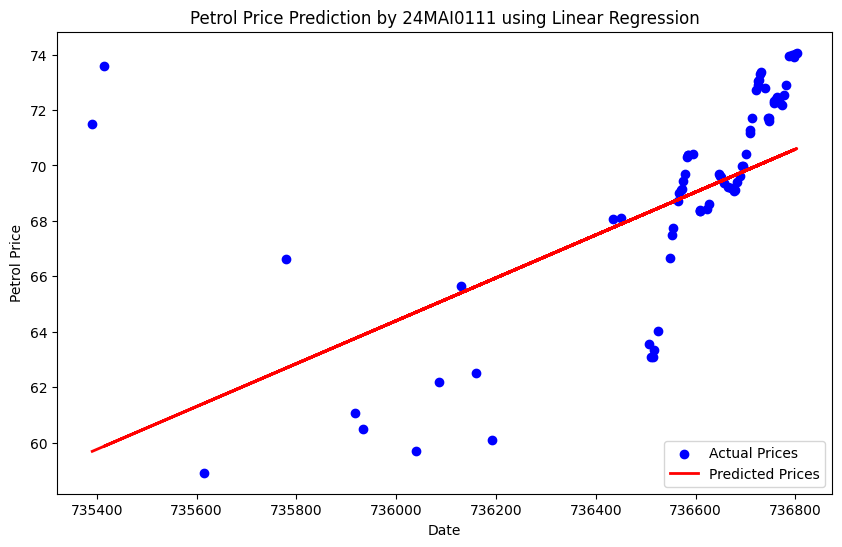

In [142]:
#plots the scatter plot for prediction.
plt.figure(figsize=(10,6))
plt.scatter(X_test, Y_test, color = 'blue', label='Actual Prices')
plt.plot(X_test,Y_pred, color='red', linewidth=2, label="Predicted Prices")
plt.xlabel('Date')
plt.ylabel('Petrol Price')
plt.title('Petrol Price Prediction by 24MAI0111 using Linear Regression')
plt.legend()
plt.show()